# Vishal Patel matplotlib hw

## Observations and Insights

1. One observation I can make from this analysis is with the oultiers found. It seems as if the only outlier for a Drug Regimen came from Infubinol, and it was only 1. That could potentially translate into a good thing, as that means the drugs usually worked as expected.

2. Another obervation I made is that the Drug Capomulin is potent enough to help reduce the size of tumors in the mice. This is because in addition to the sample line plot showing that tumor size decreased, the plot that I made myself also showed an improvement, which is a start of a good sign for the usability of Capomulin.

3. A final observation I can make is that of the mice tested, there is almost a 50/50 split as to whether a mice was female or male. This adds to the credibility of the experiments, that there isn't a noticeable difference in each drug's effectiveness based on the gender of the subject.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
print(merge_df["Mouse ID"].nunique())

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated1 = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
print(duplicated1["Mouse ID"].unique()[0])

g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated2 = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
duplicated2
#could not get this to show all the mice shown in the example, not sure why

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
nametodrop = str(duplicated1["Mouse ID"].unique()[0])
clean_df = merge_df[merge_df["Mouse ID"] != nametodrop]

In [6]:
# Check the number of mice in the clean DataFrame.
print(clean_df["Mouse ID"].nunique())

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use this straighforward method, create multiple series and put them all in a dataframe at the end.


In [8]:
grouped_med = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean = grouped_med.mean()
median = grouped_med.median()
var = grouped_med.var()
std = grouped_med.std()
sem = grouped_med.sem()
stats_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": var,
                        "Tumor Volume Std. Dev.": std, "Tumor Volue Std. Err.": sem})
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volue Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use method to produce everything with a single groupby function

In [12]:
stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


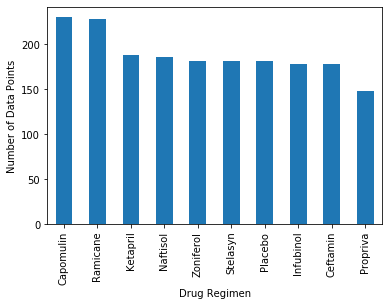

In [12]:
#Charting a bar chart using Pandas functions
grouped_drugs = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
grouped_drugs = grouped_drugs.sort_values(ascending=False)
grouped_drugs.plot(kind = "bar")
plt.ylabel("Number of Data Points")
plt.show()

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


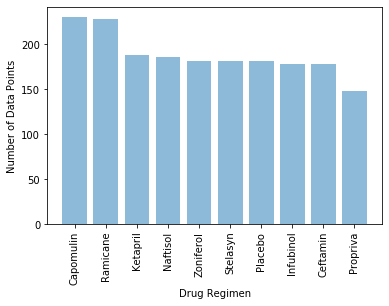

In [14]:
#Charting a bar chart using only PyPlot
#going to use the same grouped drugs as the last cell since it is already sorted
drug_names = list(grouped_drugs.index.values)
plt.bar(drug_names, grouped_drugs,alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


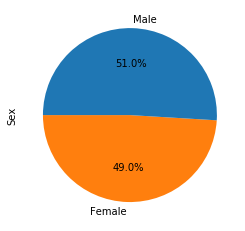

In [17]:
grouped_sex = clean_df.groupby("Sex")["Mouse ID"].count() #groups by gender
genders = list(grouped_sex.index.values) #gives the genders in a list of strings
grouped_sex.plot(kind = "pie", colors = ["tab:orange", "tab:blue"], autopct='%1.1f%%', startangle = 180)
plt.ylabel("Sex")
plt.show()

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


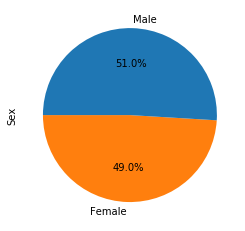

In [16]:
#Generate pie chart of male vs female using pyplot
#used the grouped_sex from the previous cell since I would need the same data
#also reused genders from the previous cell
values = grouped_sex
colors = ["orange", "lightblue"]
plt.pie(values, labels=genders, colors = ["tab:orange", "tab:blue"],
        autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [20]:
highest_timepoints = clean_df.groupby('Mouse ID')["Timepoint"].max().reset_index()
latest_timepoint = pd.merge(clean_df, highest_timepoints, on = ["Mouse ID", "Timepoint"])
latest_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [26]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_rows = latest_timepoint.loc[latest_timepoint["Drug Regimen"] == drug]
    # add subset to tumor volume data list
    volumes = drug_rows["Tumor Volume (mm3)"]
    tumor_vol_list.append(volumes)
    # Determine outliers using upper and lower bounds
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    

    lower_bound = float(lowerq - (1.5*iqr))
    upper_bound = float(upperq + (1.5*iqr))
    #had some trouble getting the or operator to work correctly so I had to split the check for outliers
    upper_outliers = drug_rows.loc[drug_rows["Tumor Volume (mm3)"] > upper_bound]
    lower_outliers = drug_rows.loc[drug_rows["Tumor Volume (mm3)"] < lower_bound]
    num_outliers = len(upper_outliers) + len(lower_outliers)
    outlier_values = list(pd.merge(upper_outliers, lower_outliers, how = "outer")["Tumor Volume (mm3)"])

    if num_outliers == 0:
        print(f"Potential Outliers for {drug}: {num_outliers}")
    else:
        print(f"Potential Outliers for {drug}: {num_outliers}, includes {outlier_values}")
    

Potential Outliers for Capomulin: 0
Potential Outliers for Ramicane: 0
Potential Outliers for Infubinol: 1, includes [36.321345799999996]
Potential Outliers for Ceftamin: 0


In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


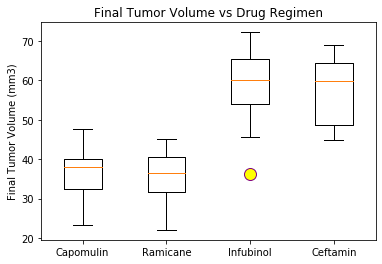

In [27]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume vs Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
#found out about flierprops from Googling, in order to color in the outlier
flierprops = dict(marker='o', markerfacecolor='yellow', markersize=12,
                  linestyle='none', markeredgecolor='purple')
ax1.boxplot(tumor_vol_list, labels = treatment_list, flierprops = flierprops)
plt.show()

## Line and Scatter Plots

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


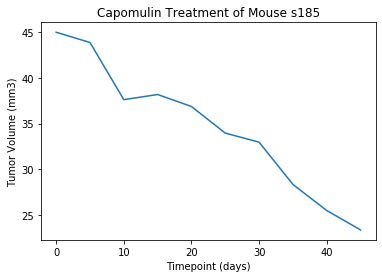

In [30]:
#getting Capomulin mice, then picking the first one that is unique, and using loc to get all the info I need
cap_mice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mice_to_plot = list(cap_mice["Mouse ID"].unique())[0]
single_mouse = cap_mice.loc[clean_df["Mouse ID"] == mice_to_plot]
plt.plot(list(single_mouse["Timepoint"]), list(single_mouse["Tumor Volume (mm3)"]))
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of Mouse {mice_to_plot}")
plt.show()

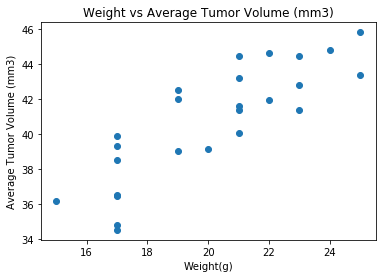

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

means = cap_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weights = cap_mice.groupby("Mouse ID")["Weight (g)"].unique()


#plotting scatter plot
plt.scatter(weights, means)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between weight and average tumor volume is 0.84


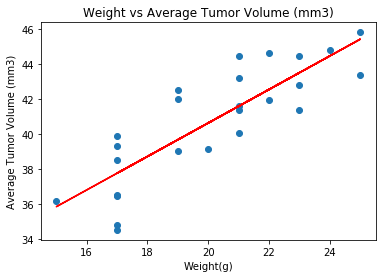

In [33]:
from scipy.stats import linregress
#had to format weights a bit differently to get it to run in linregress function
#needed to put weight in a list to pass to the linregress function. It's because I used unique() for weights,
#so that gave me a list within a list
weight = [float(i) for i in weights]

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, means)

regress_values = weights * slope + intercept
correlation = st.pearsonr(weight,means)
print(f"The correlation between weight and average tumor volume is {round(correlation[0],2)}")
plt.scatter(weights, means)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume (mm3)")
plt.plot(weights,regress_values,"r-")
plt.show()